# ASReview Simulation with new performance metrics and new models

## [EXAMPLE] ASReview Simulation API

reference: https://asreview.readthedocs.io/en/stable/simulation_api_example.html

### Creating a Project

In [1]:
from pathlib import Path

from asreview import ASReviewData, ASReviewProject
from asreview.review import ReviewSimulate

In [4]:
import shutil
from asreview.project import ProjectExistsError

project_path = Path("tmp_data")
project_path.mkdir(exist_ok=True)

try:
  project = ASReviewProject.create(
    project_path=project_path / "api_simulation",
    project_id="api_example",
    project_mode="simulate",
    project_name="api_example",
  )
except ProjectExistsError:
  shutil.rmtree("tmp_data")
  project = ASReviewProject.create(
    project_path=project_path / "api_simulation",
    project_id="api_example",
    project_mode="simulate",
    project_name="api_example",
  )

### Download the dataset

In [5]:
!curl https://raw.githubusercontent.com/asreview/systematic-review-datasets/metadata-v1-final/datasets/van_de_Schoot_2017/output/van_de_Schoot_2017.csv > tmp_data/api_simulation/data/van_de_Schoot_2017.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  9.9M  100  9.9M    0     0  3042k      0  0:00:03  0:00:03 --:--:-- 3042k


### Dataset exploration

In [6]:
import pandas as pd

df = pd.read_csv('tmp_data/api_simulation/data/van_de_Schoot_2017.csv')

df


,record_id,title,abstract,keywords,authors,year,date,doi,label_included,label_abstract_screening,duplicate_record_id
0,1,Manual for ASEBA School-Age Forms & Profiles,NaN,NaN,"Achenbach, T. M., Rescorla, L. A.",2001.0,2001,NaN,0,0,NaN
1,2,Queensland Trauma Registry: A summary of paedi...,NaN,NaN,"Dallow, N., Lang, J., Bellamy, N.",2007.0,2007,NaN,0,0,NaN
2,3,Posttraumatic Stress Disorder: Scientific and ...,This comprehensive overview of research and cl...,NaN,"Ford, J. D., Grasso, D. J., Elhai, J. D., Cour...",2015.0,NaN,NaN,0,0,NaN
3,4,SOCIAL CLASS AND MENTAL ILLNESS,NaN,NaN,"Hollingshead, A. B., Redlich, F. C.",1958.0,NaN,NaN,0,0,NaN
4,5,Computerised test generation for cross-nationa...,“‘Computerised Test Generation for Cross-Natio...,NaN,"Irvine, S. H.",2014.0,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6184,6185,Biological and clinical framework for posttrau...,Three decades of posttraumatic stress disorder...,NaN,"Vermetten, E., Lanius, R. A.",2012.0,NaN,NaN,0,0,NaN
6185,6186,Dividing traffic sub-areas based on a parallel...,In order to alleviate the traffic congestion a...,"GPS trajectories, K-means, MapReduce, Traffic ...","Wang, B., Tao, L., Gao, C., Xia, D., Rong, Z.,...",2014.0,NaN,NaN,0,0,NaN
6186,6187,Quantifying resilience to enhance individualiz...,Resilience is the human ability to adapt in th...,"Adaptation, Autonomic Nervous System, Resilien...","Winslow, B., Carroll, M., Jones, D., Hannigan,...",2013.0,NaN,NaN,0,0,NaN
6187,6188,A discriminant analysis of variables related t...,NaN,NaN,"Frye, James S.",1981.0,NaN,NaN,0,1,NaN


In [7]:
df.describe()

,record_id,year,label_included,label_abstract_screening,duplicate_record_id
count,6189.00000,6173.000000,6189.000000,6189.000000,407.000000
mean,3095.00000,2007.933096,0.006948,0.062692,3009.719902
std,1786.75474,7.125045,0.083070,0.242428,1884.494081
min,1.00000,1889.000000,0.000000,0.000000,13.000000
25%,1548.00000,2005.000000,0.000000,0.000000,1320.000000
50%,3095.00000,2010.000000,0.000000,0.000000,3021.000000
75%,4642.00000,2013.000000,0.000000,0.000000,4732.500000
max,6189.00000,2016.000000,1.000000,1.000000,6099.000000


In [8]:
count_included = df[df.label_included == 1].count().label_included
included_percentage = (count_included / len(df)) * 100

print(f"Size: {len(df)}")
print(f"Included count: {count_included}")
print(f"Included percentage: {round(included_percentage, 2)}%")

Size: 6189
Included count: 43
Included percentage: 0.69%


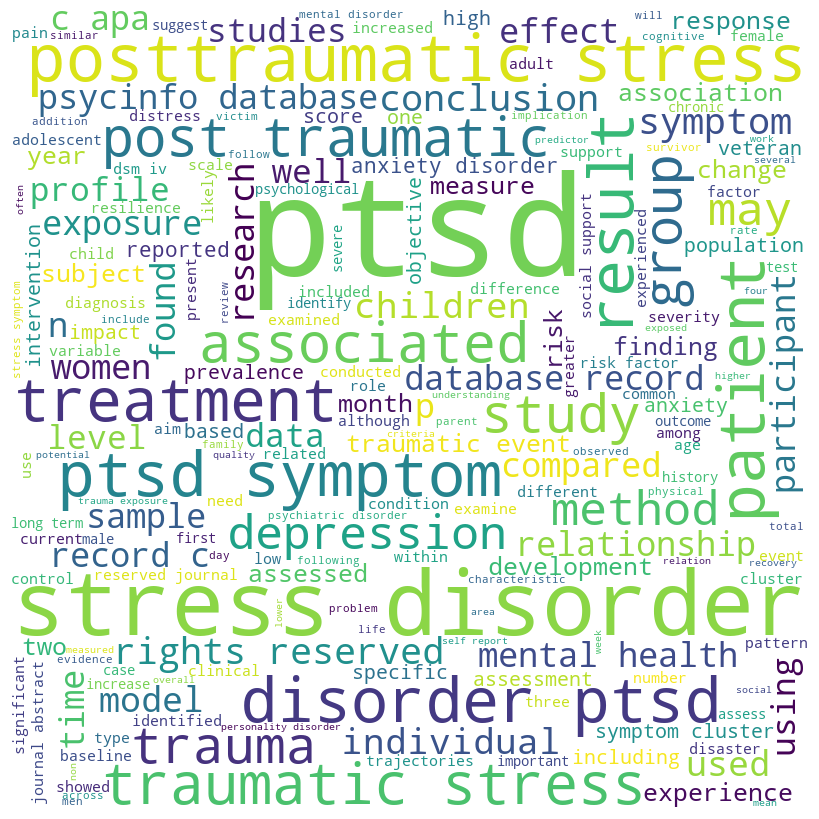

In [11]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

abstract_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.abstract:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	abstract_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(abstract_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


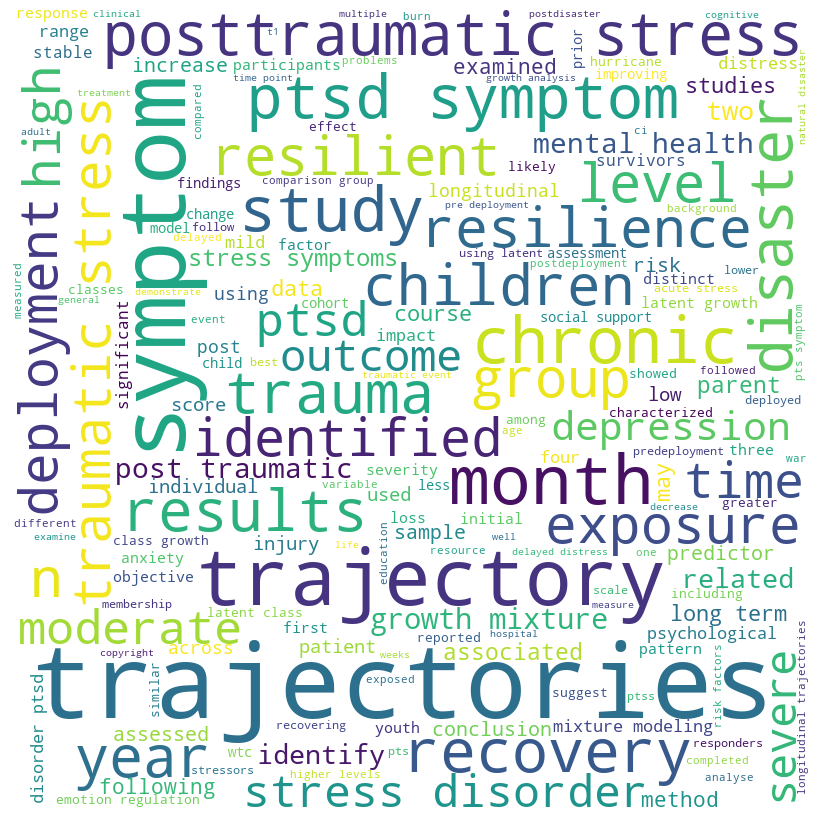

In [12]:
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

abstract_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
included_filtered = df[df.label_included == 1]
for val in included_filtered.abstract:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	abstract_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(abstract_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


### Select models

In [13]:
from asreview.models.classifiers import NaiveBayesClassifier
from asreview.models.query import MaxQuery
from asreview.models.balance import DoubleBalance
from asreview.models.feature_extraction import Tfidf

# Select models to use
train_model = NaiveBayesClassifier()
query_model = MaxQuery()
balance_model = DoubleBalance()
feature_model = Tfidf()

In [14]:
data_obj = ASReviewData.from_file(
  Path("tmp_data", "api_simulation", "data", "van_de_Schoot_2017.csv")
)

### Simulate review

In [15]:
# Initialize the simulation reviewer
reviewer = ReviewSimulate(
  as_data=data_obj,
  model=train_model,
  query_model=query_model,
  balance_model=balance_model,
  feature_model=feature_model,
  n_instances=10,
  project=project,
  n_prior_included=1,
  n_prior_excluded=1,
)

In [16]:
# Start the review process
project.update_review(status="review")
try:
    reviewer.review()
    project.mark_review_finished()
except Exception as err:
    project.update_review(status="error")
    raise err

Records labeled       : 100%|██████████| 6189/6189 [00:06<00:00, 903.71it/s]


### Export project for further analysis

In [17]:
# Finish and export the project
project.export(Path("tmp_data", "api_example.asreview"))

### Visualize WSS and Recall

reference: https://github.com/asreview/asreview-insights/blob/main/README.md

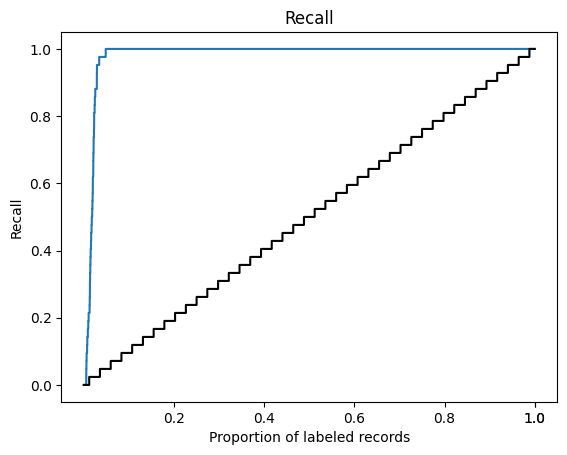

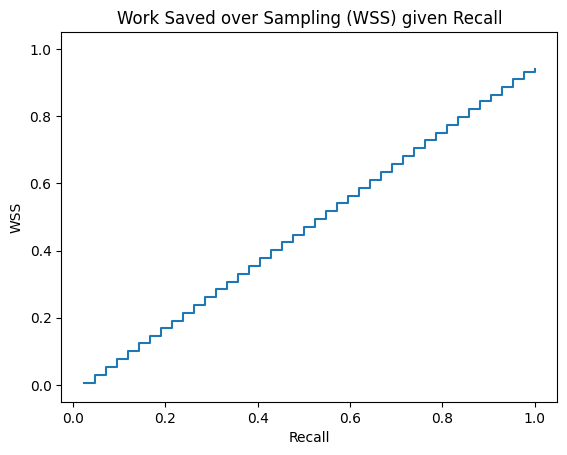

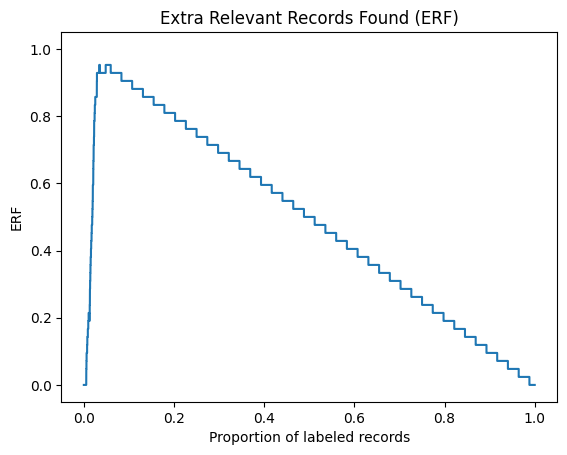

In [18]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_recall, plot_wss, plot_erf

Path("tmp_data/visualizations/").mkdir(exist_ok=True)

with open_state("tmp_data/api_example.asreview") as s:

  # Plot recall
  fig, ax = plt.subplots()
  plot_recall(ax, s)
  fig.savefig("tmp_data/visualizations/plot_recall.png")

  # Plot WSS
  fig, ax = plt.subplots()
  plot_wss(ax, s)
  fig.savefig("tmp_data/visualizations/plot_wss.png")

  # Plot WSS
  fig, ax = plt.subplots()
  plot_erf(ax, s)
  fig.savefig("tmp_data/visualizations/plot_erf.png")

### Inspect Performance Metrics

- WSS@95
- ERF@10
- ATD

reference:

- https://systematicreviewsjournal.biomedcentral.com/articles/10.1186/s13643-023-02257-7#Sec8
- https://github.com/asreview/asreview-insights/blob/main/asreviewcontrib/insights/metrics.py

In [19]:
from asreviewcontrib.insights.metrics import get_metrics, print_metrics

with open_state("tmp_data/api_example.asreview") as s:
  metrics = get_metrics(s)

print_metrics(metrics)

{
    "asreviewVersion": "1.5",
    "apiVersion": null,
    "data": {
        "items": [
            {
                "id": "recall",
                "title": "Recall",
                "value": [
                    [
                        0.1,
                        1.0
                    ],
                    [
                        0.25,
                        1.0
                    ],
                    [
                        0.5,
                        1.0
                    ],
                    [
                        0.75,
                        1.0
                    ],
                    [
                        0.9,
                        1.0
                    ]
                ]
            },
            {
                "id": "wss",
                "title": "Work Saved over Sampling",
                "value": [
                    [
                        0.95,
                        0.8876676903184095
                    ]
                ]
 

In [82]:
import pandas as pd

with open_state("tmp_data/api_example.asreview") as s:
  df = s.get_dataset()

mit = pd.to_datetime(df.labeling_time.sort_values(ascending=True).unique()).to_series().diff().median().total_seconds() * 1000
print(f'Median iteration time: {mit} ms')

Median iteration time: 10.777999999999999 ms


## [EXAMPLE] SYNERGY Dataset

reference: https://github.com/asreview/synergy-dataset/blob/master/examples/Python_getting_started.ipynb

In [ ]:
from pprint import pprint

from synergy_dataset import Dataset, iter_datasets

###  Get each dataset as pandas DataFrame

In [ ]:
for d in iter_datasets():

    df = d.to_frame()

    print(d.name, type(df))

Appenzeller-Herzog_2019 <class 'pandas.core.frame.DataFrame'>
Bos_2018 <class 'pandas.core.frame.DataFrame'>
Brouwer_2019 <class 'pandas.core.frame.DataFrame'>
Chou_2003 <class 'pandas.core.frame.DataFrame'>
Chou_2004 <class 'pandas.core.frame.DataFrame'>
Donners_2021 <class 'pandas.core.frame.DataFrame'>
Hall_2012 <class 'pandas.core.frame.DataFrame'>
Jeyaraman_2020 <class 'pandas.core.frame.DataFrame'>
Leenaars_2019 <class 'pandas.core.frame.DataFrame'>
Leenaars_2020 <class 'pandas.core.frame.DataFrame'>
Meijboom_2021 <class 'pandas.core.frame.DataFrame'>
Menon_2022 <class 'pandas.core.frame.DataFrame'>
Moran_2021 <class 'pandas.core.frame.DataFrame'>
Muthu_2021 <class 'pandas.core.frame.DataFrame'>
Nelson_2002 <class 'pandas.core.frame.DataFrame'>
Oud_2018 <class 'pandas.core.frame.DataFrame'>
Radjenovic_2013 <class 'pandas.core.frame.DataFrame'>
Sep_2021 <class 'pandas.core.frame.DataFrame'>
Smid_2020 <class 'pandas.core.frame.DataFrame'>
van_de_Schoot_2018 <class 'pandas.core.fram

In [ ]:
df.head()

,doi,title,abstract,label_included
openalex_id,,,,
https://openalex.org/W2478209357,https://doi.org/10.1016/j.resuscitation.2016.0...,Aetiology of in-hospital cardiac arrest on gen...,Aetiology of in-hospital cardiac arrests (IHCA...,0
https://openalex.org/W2095179087,https://doi.org/10.1016/j.psym.2011.02.007,Linking Electronic Health Record-Extracted Psy...,Background Knowledge of psychosocial character...,0
https://openalex.org/W1955235752,https://doi.org/10.3389/fphar.2015.00258,HDL and glucose metabolism: current evidence a...,High-density lipoprotein (HDL) and its princip...,0
https://openalex.org/W2373924009,https://doi.org/10.1159/000446159,Reduced Cardiovascular Mortality Associated wi...,&lt;b&gt;&lt;i&gt;Background:&lt;/i&gt;&lt;/b&...,0
https://openalex.org/W1997922550,https://doi.org/10.1002/mds.20700,Long-term benefits of rivastigmine in dementia...,In patients with dementia associated with Park...,0


### Get each dataset as dict

In [ ]:
for d in iter_datasets():

    obj = d.to_dict()

    print(d.name, type(obj))

Appenzeller-Herzog_2019 <class 'dict'>
Bos_2018 <class 'dict'>
Brouwer_2019 <class 'dict'>
Chou_2003 <class 'dict'>
Chou_2004 <class 'dict'>
Donners_2021 <class 'dict'>
Hall_2012 <class 'dict'>
Jeyaraman_2020 <class 'dict'>
Leenaars_2019 <class 'dict'>
Leenaars_2020 <class 'dict'>
Meijboom_2021 <class 'dict'>
Menon_2022 <class 'dict'>
Moran_2021 <class 'dict'>
Muthu_2021 <class 'dict'>
Nelson_2002 <class 'dict'>
Oud_2018 <class 'dict'>
Radjenovic_2013 <class 'dict'>
Sep_2021 <class 'dict'>
Smid_2020 <class 'dict'>
van_de_Schoot_2018 <class 'dict'>
van_der_Valk_2021 <class 'dict'>
van_der_Waal_2022 <class 'dict'>
van_Dis_2020 <class 'dict'>
Walker_2018 <class 'dict'>
Wassenaar_2017 <class 'dict'>
Wolters_2018 <class 'dict'>


### Get single dataset

In [ ]:
d = Dataset("Hall_2012")

d.to_frame()

,doi,title,abstract,label_included
openalex_id,,,,
https://openalex.org/W2131536587,https://doi.org/10.1109/indcon.2010.5712716,Computer vision based offset error computation...,The use of computer vision based approach has ...,0
https://openalex.org/W2557025555,https://doi.org/10.1109/induscon.2010.5740045,Design and development of a software for fault...,This paper presents an on-line fault diagnosis...,0
https://openalex.org/W2143148279,https://doi.org/10.1109/tpwrd.2005.848672,Analytical Approach to Internal Fault Simulati...,A new method for simulating faulted transforme...,0
https://openalex.org/W2111816457,https://doi.org/10.1109/icelmach.2008.4799852,Nonlinear equivalent circuit model of a tracti...,The paper presents the development of an equiv...,0
https://openalex.org/W3142547111,https://doi.org/10.1109/ipdps.2006.1639408,Fault tolerance with real-time Java,After having drawn up a state of the art on th...,0
...,...,...,...,...
https://openalex.org/W1974230717,https://doi.org/10.1049/iet-cdt:20070118,"Self-routing, reconfigurable and fault-toleran...",Many examples of reconfigurable fault-tolerant...,0
https://openalex.org/W2572727817,https://doi.org/10.1109/tia.2003.811784,Stator winding turn-fault detection for closed...,Sensorless diagnostics for line-connected mach...,0
https://openalex.org/W2107635292,https://doi.org/10.1109/dsn.2007.99,Using Register Lifetime Predictions to Protect...,To increase the resistance of register files t...,0


### Get other variables than title and abstract

In [ ]:
d = Dataset("Hall_2012")

obj = d.to_dict(["title", "referenced_works"])

pprint(list(obj.values())[0])

{'label_included': 0,
 'referenced_works': ['https://openalex.org/W68154617',
                      'https://openalex.org/W96697480',
                      'https://openalex.org/W1985243637',
                      'https://openalex.org/W2041367003',
                      'https://openalex.org/W2100368227',
                      'https://openalex.org/W2125186487',
                      'https://openalex.org/W2220315489',
                      'https://openalex.org/W2276549114',
                      'https://openalex.org/W2540405531'],
 'title': 'Computer vision based offset error computation for web printing '
          'machines using FPGA'}


### Get metadata about the final publication

In [ ]:
d = Dataset("Hall_2012")

# the full OpenAlex work
d.metadata

{'key': 'Hall_2012',
 'collection': {'id': 'https://openalex.org/W2785836523',
  'doi': 'https://doi.org/10.1007/s10664-017-9587-0',
  'title': 'Finding better active learners for faster literature reviews',
  'display_name': 'Finding better active learners for faster literature reviews',
  'publication_year': 2016,
  'publication_date': '2016-12-10',
  'ids': {'openalex': 'https://openalex.org/W2785836523',
   'doi': 'https://doi.org/10.1007/s10664-017-9587-0',
   'mag': '2785836523'},
  'primary_location': {'is_oa': False,
   'landing_page_url': 'https://doi.org/10.1007/s10664-017-9587-0',
   'pdf_url': None,
   'source': {'id': 'https://openalex.org/S109852484',
    'display_name': 'Empirical Software Engineering',
    'issn_l': '1382-3256',
    'issn': ['1382-3256', '1573-7616'],
    'host_organization': 'https://openalex.org/P4310319900',
    'host_organization_name': 'Springer Science+Business Media',
    'type': 'journal'},
   'license': None,
   'version': None},
  'host_venue'

### Build one big dataset

In [ ]:
import pandas as pd

pd.concat([d.to_frame() for d in iter_datasets()], axis=0)

,doi,title,abstract,label_included
openalex_id,,,,
https://openalex.org/W2402226166,None,Clinical aspects of Wilson's disease.,None,0
https://openalex.org/W2416808666,None,[Hepatic changes in the neurological form of W...,None,0
https://openalex.org/W2060266518,https://doi.org/10.1016/s1367-5931(03)00018-8,Copper in medicine,Copper has been found to be causative in sever...,0
https://openalex.org/W2412464989,https://doi.org/10.5694/j.1326-5377.1970.tb634...,HEPATOLENTICULAR DEGENERATION (WILSON'S DISEAS...,None,0
https://openalex.org/W66518910,None,[Lupus erythematosus due to penicillamine asso...,None,0
...,...,...,...,...
https://openalex.org/W1995096921,https://doi.org/10.1016/j.injury.2012.07.007,A kick in the shins: The financial impact of u...,Warfarin is increasingly prescribed in the eld...,0
https://openalex.org/W1504586396,None,Use of aspirin in cardiovascular prophylaxis.,The value of prophylatic low-dose aspirin in p...,0
https://openalex.org/W2114922669,https://doi.org/10.1177/1076029615598222,Home Treatment of Deep Venous Thrombosis in th...,This is a retrospective cohort study of adults...,0


## [EXAMPLE] Custom ASReview Model

reference: https://asreview.readthedocs.io/en/stable/extensions_dev.html#model-extensions

In [ ]:
from sklearn.neural_network import MLPClassifier

from asreview.models.classifiers.base import BaseTrainClassifier


class CustomClassifier(BaseTrainClassifier):

    name = "custom"

    def __init__(self):

        super().__init__()
        self._model = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

        def fit(self, X, y):
            """Fit the model to the data."""
            return self._model.fit(X, y)

        def predict_proba(self, X):
            """Get the inclusion probability for each sample."""
            return self._model.predict_proba(X)

In [ ]:
import shutil
from asreview.project import ProjectExistsError

project_path = Path("tmp_data_custom")
project_path.mkdir(exist_ok=True)

try:
  project = ASReviewProject.create(
    project_path=project_path / "api_simulation",
    project_id="api_example",
    project_mode="simulate",
    project_name="api_example",
  )
except ProjectExistsError:
  shutil.rmtree("tmp_data_custom")
  project = ASReviewProject.create(
    project_path=project_path / "api_simulation",
    project_id="api_example",
    project_mode="simulate",
    project_name="api_example",
  )

In [ ]:
from asreview.models.query import MaxQuery
from asreview.models.balance import DoubleBalance
from asreview.models.feature_extraction import Tfidf

# Select models to use
train_model = CustomClassifier()
query_model = MaxQuery()
balance_model = DoubleBalance()
feature_model = Tfidf()

In [ ]:
data_obj = ASReviewData.from_file(
  Path("tmp_data", "api_simulation", "data", "van_de_Schoot_2017.csv")
)

/usr/local/lib/python3.10/dist-packages/asreview/io/utils.py:142: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(LABEL_NA, inplace=True)


In [ ]:
# Initialize the simulation reviewer
reviewer = ReviewSimulate(
  as_data=data_obj,
  model=train_model,
  query_model=query_model,
  balance_model=balance_model,
  feature_model=feature_model,
  n_instances=10,
  project=project,
  n_prior_included=1,
  n_prior_excluded=1,
)

In [ ]:
# Start the review process
project.update_review(status="review")
try:
    reviewer.review()
    project.mark_review_finished()
except Exception as err:
    project.update_review(status="error")
    raise err

Records labeled       :  17%|█▋        | 1052/6189 [02:03<10:31,  8.13it/s]/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)

Records labeled       : 100%|██████████| 6189/6189 [17:56<00:00,  5.75it/s]


In [ ]:
# Finish and export the project
project.export(Path("tmp_data_custom", "api_example.asreview"))

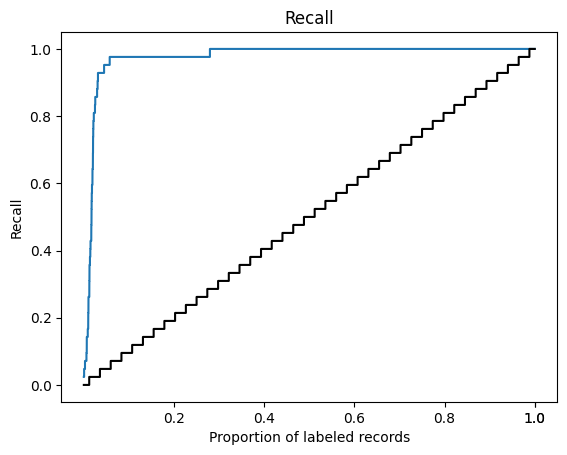

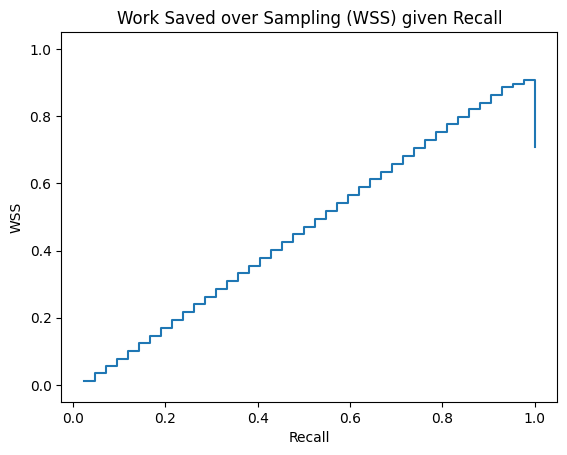

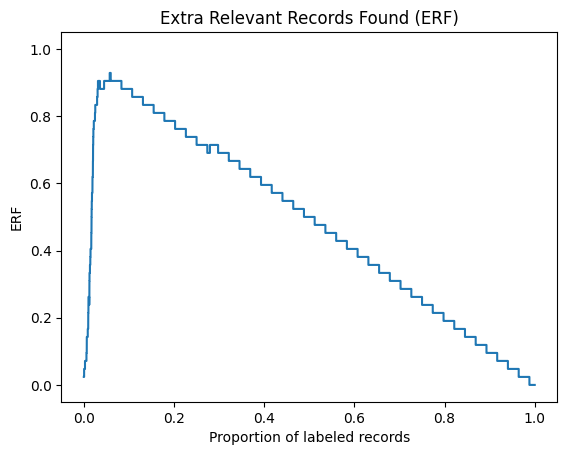

In [ ]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_recall, plot_wss, plot_erf

Path("tmp_data_custom/visualizations/").mkdir(exist_ok=True)

with open_state("tmp_data_custom/api_example.asreview") as s:

  # Plot recall
  fig, ax = plt.subplots()
  plot_recall(ax, s)
  fig.savefig("tmp_data_custom/visualizations/plot_recall.png")

  # Plot WSS
  fig, ax = plt.subplots()
  plot_wss(ax, s)
  fig.savefig("tmp_data_custom/visualizations/plot_wss.png")

  # Plot WSS
  fig, ax = plt.subplots()
  plot_erf(ax, s)
  fig.savefig("tmp_data_custom/visualizations/plot_erf.png")

In [ ]:
from asreviewcontrib.insights.metrics import get_metrics, print_metrics

with open_state("tmp_data_custom/api_example.asreview") as s:
  metrics = get_metrics(s)

print_metrics(metrics)

{
    "asreviewVersion": "1.6.1",
    "apiVersion": null,
    "data": {
        "items": [
            {
                "id": "recall",
                "title": "Recall",
                "value": [
                    [
                        0.1,
                        0.9761904761904762
                    ],
                    [
                        0.25,
                        0.9761904761904762
                    ],
                    [
                        0.5,
                        1.0
                    ],
                    [
                        0.75,
                        1.0
                    ],
                    [
                        0.9,
                        1.0
                    ]
                ]
            },
            {
                "id": "wss",
                "title": "Work Saved over Sampling",
                "value": [
                    [
                        0.95,
                        0.885243251979958
          

In [ ]:
with open_state("tmp_data_custom/api_example.asreview") as s:
  df = s.get_dataset()


mit = pd.to_datetime(df.labeling_time.sort_values(ascending=True).unique()).diff().median().total_seconds() * 1000
print(f'Median iteration time: {mit} ms')

Median iteration time: 1525.3480000000002 ms


## Experiment with Brouwer et al. (2019) datasets

### Dataset

In [10]:
data_path = Path("data")
data_path.mkdir(exist_ok=True)

parent_project_path = Path("projects")
parent_project_path.mkdir(exist_ok=True)

parent_project_path = Path("states")
parent_project_path.mkdir(exist_ok=True)

In [89]:
!wget -O data/brouwer_et_al.xlsx https://osf.io/download/2mwkd/

--2024-04-15 19:14:08--  https://osf.io/download/2mwkd/
Resolving osf.io (osf.io)... 35.190.84.173
Connecting to osf.io (osf.io)|35.190.84.173|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://files.de-1.osf.io/v1/resources/r45yz/providers/osfstorage/61a8cea20db659030f8364fa [following]
--2024-04-15 19:14:09--  https://files.de-1.osf.io/v1/resources/r45yz/providers/osfstorage/61a8cea20db659030f8364fa
Resolving files.de-1.osf.io (files.de-1.osf.io)... 35.186.249.111
Connecting to files.de-1.osf.io (files.de-1.osf.io)|35.186.249.111|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://storage.googleapis.com/cos-osf-prod-files-de-1/7e527ddeff565c7e5be48c500dd58f37ade2766d8507a37b3710b2bf5c1f4708?response-content-disposition=attachment%3B%20filename%3D%22brouwer_2019_deduplicated.xlsx%22%3B%20filename%2A%3DUTF-8%27%27brouwer_2019_deduplicated.xlsx&GoogleAccessId=files-de-1%40cos-osf-prod.iam.gserviceaccount.com&Expires=

In [90]:
read_file = pd.read_excel(Path("data", "brouwer_et_al.xlsx"))
read_file.to_csv(Path("data", "brouwer_et_al.csv"), index=False, header=True)

### Additional Models

#### Teijema et al. (2023) CNN Model

reference: https://github.com/jteijema/asreview-plugin-model-cnn-17-layer/blob/main/asreviewcontrib/models/cnn.py

In [1]:
# Copyright 2020 The ASReview Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

from math import ceil

import tensorflow as tf

from keras import Sequential
from keras import layers
from keras import activations
from keras import optimizers
from scikeras.wrappers import KerasClassifier
from keras import callbacks
from keras import backend

from asreview.models.classifiers.base import BaseTrainClassifier


class POWER_CNN(BaseTrainClassifier):

    name = "power_cnn"

    def __init__(self, verbose=1, patience=15, min_delta=0.025):
        """Initialize the conv neural network model."""
        super(POWER_CNN, self).__init__()
        self.patience = patience
        self._model = None
        self.min_delta = min_delta
        self.verbose = verbose

        print("""

██████╗  ██████╗ ██╗    ██╗███████╗██████╗
██╔══██╗██╔═══██╗██║    ██║██╔════╝██╔══██╗
██████╔╝██║   ██║██║ █╗ ██║█████╗  ██████╔╝
██╔═══╝ ██║   ██║██║███╗██║██╔══╝  ██╔══██╗
██║     ╚██████╔╝╚███╔███╔╝███████╗██║  ██║
╚═╝      ╚═════╝  ╚══╝╚══╝ ╚══════╝╚═╝  ╚═╝
        ██████╗███╗   ██╗███╗   ██╗
       ██╔════╝████╗  ██║████╗  ██║
       ██║     ██╔██╗ ██║██╔██╗ ██║
       ██║     ██║╚██╗██║██║╚██╗██║
       ╚██████╗██║ ╚████║██║ ╚████║
        ╚═════╝╚═╝  ╚═══╝╚═╝  ╚═══╝

 """)

    def fit(self, X, y):

        #tf.config.threading.set_intra_op_parallelism_threads(1)
        #tf.config.threading.set_inter_op_parallelism_threads(1)
        #tf.config.set_soft_device_placement(True)

        self._model = KerasClassifier(_create_dense_nn_model(X.shape[1]))
        callback = callbacks.EarlyStopping(
            min_delta=self.min_delta,
            monitor='loss',
            patience=self.patience,
            restore_best_weights=True)

        print("\n Fitting New Iteration:\n")
        self._model.fit(
            _format(X),
            y,
            batch_size=ceil(X.shape[0]/20),
            epochs=100,
            shuffle=True,
            callbacks=[callback],
            verbose=self.verbose,)

    def predict_proba(self, X):
        return self._model.predict_proba(_format(X))


def _format(X):
    return X.reshape((X.shape[0], X.shape[1], 1))


def _create_dense_nn_model(_size):

    def model_wrapper():

        backend.clear_session()

        model = Sequential()

        model.add(layers.SeparableConv1D(input_shape=(_size, 1),
                  filters=256, kernel_size=5, padding='valid'))
        model.add(layers.Activation(activations.relu))
        model.add(layers.SeparableConv1D(
            filters=256, kernel_size=5, padding='valid'))
        model.add(layers.Activation(activations.relu))
        model.add(layers.MaxPooling1D(pool_size=2, padding='valid'))

        model.add(layers.SeparableConv1D(
            filters=256, kernel_size=3, padding='valid'))
        model.add(layers.Activation(activations.relu))
        model.add(layers.SeparableConv1D(
            filters=256, kernel_size=3, padding='valid'))
        model.add(layers.Activation(activations.relu))
        model.add(layers.MaxPooling1D(pool_size=2, padding='valid'))
        model.add(layers.Dropout(rate=0.5))

        model.add(layers.Flatten())
        model.add(layers.Dense(128))
        model.add(layers.Activation(activations.relu))
        model.add(layers.Dropout(rate=0.5))
        model.add(layers.Dense(16))

        model.add(layers.Dense(1, activation='sigmoid'))

        model.compile(
            loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(learning_rate=0.001),
            metrics=['acc'])

        return model

    return model_wrapper

#### Teijema et al. (2023) Wide Doc2Vec Feature Extaction

reference: https://github.com/jteijema/asreview-plugin-wide-doc2vec/blob/main/asreviewcontrib/models/wide_doc2vec.py

In [2]:
# Copyright 2019-2020 The ASReview Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np
try:
    from gensim.utils import simple_preprocess
    from gensim.models.doc2vec import TaggedDocument
    from gensim.models.doc2vec import Doc2Vec as GenSimDoc2Vec
    GENSIM_AVAILABLE = True
except ImportError:
    GENSIM_AVAILABLE = False

from asreview.models.feature_extraction.base import BaseFeatureExtraction


def _check_gensim():
    if not GENSIM_AVAILABLE:
        raise ImportError(
            "Install gensim package (`pip install gensim`) to use"
            " 'Doc2Vec' model.")


def _train_model(corpus, *args, **kwargs):

    model = GenSimDoc2Vec(*args, **kwargs)
    model.build_vocab(corpus)
    model.train(corpus, total_examples=model.corpus_count, epochs=model.epochs)
    return model


def _transform_text(model, corpus):
    X = []
    for doc_id in range(len(corpus)):
        doc_vec = model.infer_vector(corpus[doc_id].words)
        X.append(doc_vec)
    return np.array(X)


class wide_doc2vec(BaseFeatureExtraction):
    """Base class for doc2vec feature extraction.

    Feature extraction method provided by the `gensim
    <https://radimrehurek.com/gensim/>`__ package. It takes relatively long to
    create a feature matrix with this method. However, this only has to be
    done once per simulation/review. The upside of this method is the
    dimension- reduction that generally takes place, which makes the modelling
    quicker.

    .. note::

        This feature extraction algorithm requires ``gensim`` to be installed.
        Use ``pip install gensim`` or install all optional ASReview
        dependencies with ``pip install asreview[all]``

    Arguments
    ---------
    vector_size: int
        Output size of the vector.
    epochs: int
        Number of epochs to train the doc2vec model.
    min_count: int
        Minimum number of occurences for a word in the corpus for it to
        be included in the model.
    n_jobs: int
        Number of threads to train the model with.
    window: int
        Maximum distance over which word vectors influence each other.
    dm_concat: int
        Whether to concatenate word vectors or not.
        See paper for more detail.
    dm: int
        Model to use.
        0: Use distribute bag of words (DBOW).
        1: Use distributed memory (DM).
        2: Use both of the above with half the vector size and concatenate
        them.
    dbow_words: int
        Whether to train the word vectors using the skipgram method.
    """

    name = "wide_doc2vec"

    def __init__(self,
                 *args,
                 vector_size=120,
                 epochs=33,
                 min_count=1,
                 n_jobs=1,
                 window=7,
                 dm_concat=0,
                 dm=2,
                 dbow_words=0,
                 **kwargs):
        """Initialize the doc2vec model."""
        super(wide_doc2vec, self).__init__(*args, **kwargs)
        self.vector_size = int(vector_size)
        self.epochs = int(epochs)
        self.min_count = int(min_count)
        self.n_jobs = int(n_jobs)
        self.window = int(window)
        self.dm_concat = int(dm_concat)
        self.dm = int(dm)
        self.dbow_words = int(dbow_words)
        self._model = None
        self._model_dm = None
        self._model_dbow = None

    def fit(self, texts):

        # check is gensim is available
        _check_gensim()

        model_param = {
            "vector_size": self.vector_size,
            "epochs": self.epochs,
            "min_count": self.min_count,
            "workers": self.n_jobs,
            "window": self.window,
            "dm_concat": self.dm_concat,
            "dbow_words": self.dbow_words,
        }

        corpus = [
            TaggedDocument(simple_preprocess(text), [i])
            for i, text in enumerate(texts)
        ]

        # If self.dm is 2, train both models and concatenate the feature
        # vectors later. Resulting vector size should be the same.
        if self.dm == 2:
            model_param["vector_size"] = int(model_param["vector_size"] / 2)
            self.model_dm = _train_model(corpus, **model_param, dm=1)
            self.model_dbow = _train_model(corpus, **model_param, dm=0)
        else:
            self.model = _train_model(corpus, **model_param, dm=self.dm)

    def transform(self, texts):

        # check is gensim is available
        _check_gensim()

        corpus = [
            TaggedDocument(simple_preprocess(text), [i])
            for i, text in enumerate(texts)
        ]

        if self.dm == 2:
            X_dm = _transform_text(self.model_dm, corpus)
            X_dbow = _transform_text(self.model_dbow, corpus)
            X = np.concatenate((X_dm, X_dbow), axis=1)
        else:
            X = _transform_text(self.model, corpus)
        return X

    def full_hyper_space(self):
        from hyperopt import hp
        eps = 1e-7

        hyper_space, hyper_choices = super(wide_doc2vec, self).full_hyper_space()
        hyper_space.update({
            "fex_vector_size":
            hp.quniform("fex_vector_size", 31.5, 127.5 - eps, 8),
            "fex_epochs":
            hp.quniform("fex_epochs", 20, 50, 1),
            "fex_min_count":
            hp.quniform("fex_min_count", 0.5, 2.499999, 1),
            "fex_window":
            hp.quniform("fex_window", 4.5, 9.4999999, 1),
            "fex_dm_concat":
            hp.randint("fex_dm_concat", 2),
            "fex_dm":
            hp.randint("fex_dm", 3),
            "fex_dbow_words":
            hp.randint("fex_dbow_words", 2),
        })

        return hyper_space, hyper_choices

#### LSTM Model

In [ ]:
# TODO LSTM Model

#### GRU Model

In [ ]:
# TODO GRU Model

### All model combination

In [4]:
import shutil
from pathlib import Path
# import asyncio
# from functools import wraps, partial

# def async_wrap(func):
#     @wraps(func)
#     async def run(*args, loop=None, executor=None, **kwargs):
#         if loop is None:
#             loop = asyncio.get_event_loop()
#         pfunc = partial(func, *args, **kwargs)
#         return await loop.run_in_executor(executor, pfunc)
#     return run

from asreview import ASReviewData, ASReviewProject
from asreview.review import ReviewSimulate
from asreview.project import ProjectExistsError

from asreview.models.classifiers import (
  LogisticClassifier,
  NaiveBayesClassifier,
  NN2LayerClassifier,
  RandomForestClassifier,
  SVMClassifier
)
from asreview.models.query import MaxQuery
from asreview.models.balance import DoubleBalance
from asreview.models.feature_extraction import (
  Tfidf,
  Doc2Vec
)

def simulate_project(
    name,
    data_filename,
    classifier_model,
    feature_extraction_model,
    query_model=MaxQuery,
    balance_model=DoubleBalance
  ):
  project_path = Path("projects", name)
  project_path.mkdir(exist_ok=True)

  try:
    project = ASReviewProject.create(
      project_path=project_path / "simulation",
      project_id=name,
      project_mode="simulate",
      project_name=name,
    )
  except ProjectExistsError:
    shutil.rmtree(project_path)
    project = ASReviewProject.create(
      project_path=project_path / "simulation",
      project_id=name,
      project_mode="simulate",
      project_name=name,
    )

  print(f"{name}: Project Created")

  data_obj = ASReviewData.from_file(
    Path("data", data_filename)
  )
  reviewer = ReviewSimulate(
    as_data=data_obj,
    model=classifier_model(),
    query_model=query_model(),
    balance_model=balance_model(),
    feature_model=feature_extraction_model(),
    n_instances=1,
    project=project,
    n_prior_included=10,
    n_prior_excluded=10,
    stop_if='min'
  )

  print(f"{name}: ReviewSimulate object Created")

  project.update_review(status="review")
  print(f"{name}: Review start")
  try:
      reviewer.review()
      project.mark_review_finished()
  except Exception as err:
      project.update_review(status="error")
      print(f"{name}: Review error: {err}")
  print(f"{name}: Review end")

  project.export(Path("states", f"{name}.asreview"))
  print(f"{name}: Review exported")

In [5]:
import multiprocessing


simulations = [
  multiprocessing.Process(target=simulate_project, args=("B_NB_T", "brouwer_et_al.csv", NaiveBayesClassifier, Tfidf)),
  multiprocessing.Process(target=simulate_project, args=("B_L_T", "brouwer_et_al.csv", LogisticClassifier, Tfidf)),
  multiprocessing.Process(target=simulate_project, args=("B_RF_T", "brouwer_et_al.csv", RandomForestClassifier, Tfidf)),
  multiprocessing.Process(target=simulate_project, args=("B_SVM_T", "brouwer_et_al.csv", SVMClassifier, Tfidf)),
  multiprocessing.Process(target=simulate_project, args=("B_L_D", "brouwer_et_al.csv", LogisticClassifier, Doc2Vec)),
  multiprocessing.Process(target=simulate_project, args=("B_RF_D", "brouwer_et_al.csv", RandomForestClassifier, Doc2Vec)),
  multiprocessing.Process(target=simulate_project, args=("B_NN_D", "brouwer_et_al.csv", NN2LayerClassifier, Doc2Vec)),
  multiprocessing.Process(target=simulate_project, args=("B_CNN_D", "brouwer_et_al.csv", POWER_CNN, wide_doc2vec))
]

def run_all_simulations():
  for simulation in simulations:
    simulation.start()
  for simulation in simulations:
    simulation.join()

In [6]:
run_all_simulations()

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^ ^^^^^^^^
^^^^  File "/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/Cellar/python@3.12/3.12.2_1/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
          self =

In [5]:
simulate_project("B_NB_T", "brouwer_et_al.csv", NaiveBayesClassifier, Tfidf)

B_NB_T: Project Created


/Users/jahnsmichael/Projects/IR ASReview/env/lib/python3.12/site-packages/asreview/io/utils.py:142: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(LABEL_NA, inplace=True)


B_NB_T: ReviewSimulate object Created
B_NB_T: Review start


Records labeled       :   7%|▋         | 3454/46376 [02:32<31:41, 22.57it/s]


B_NB_T: Review end
B_NB_T: Review exported


In [6]:
simulate_project("B_L_T", "brouwer_et_al.csv", LogisticClassifier, Tfidf)

B_L_T: Project Created


/Users/jahnsmichael/Projects/IR ASReview/env/lib/python3.12/site-packages/asreview/io/utils.py:142: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(LABEL_NA, inplace=True)


B_L_T: ReviewSimulate object Created
B_L_T: Review start
B_L_T: Review end
B_L_T: Review exported


Relevant records found:  98%|█████████▊| 62/63 [8:19:50<1:50:37, 6637.71s/it]

In [7]:
simulate_project("B_RF_T", "brouwer_et_al.csv", RandomForestClassifier, Tfidf)

B_RF_T: Project Created


/Users/jahnsmichael/Projects/IR ASReview/env/lib/python3.12/site-packages/asreview/io/utils.py:142: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(LABEL_NA, inplace=True)


B_RF_T: ReviewSimulate object Created
B_RF_T: Review start


In [ ]:
simulate_project("B_SVM_T", "brouwer_et_al.csv", SVMClassifier, Tfidf)

In [ ]:
simulate_project("B_L_D", "brouwer_et_al.csv", LogisticClassifier, Doc2Vec)

In [ ]:
simulate_project("B_NN_D", "brouwer_et_al.csv", NN2LayerClassifier, Doc2Vec)

In [ ]:
simulate_project("B_RF_D", "brouwer_et_al.csv", RandomForestClassifier, Doc2Vec)

In [ ]:
simulate_project("B_CNN_D", "brouwer_et_al.csv", POWER_CNN, wide_doc2vec)

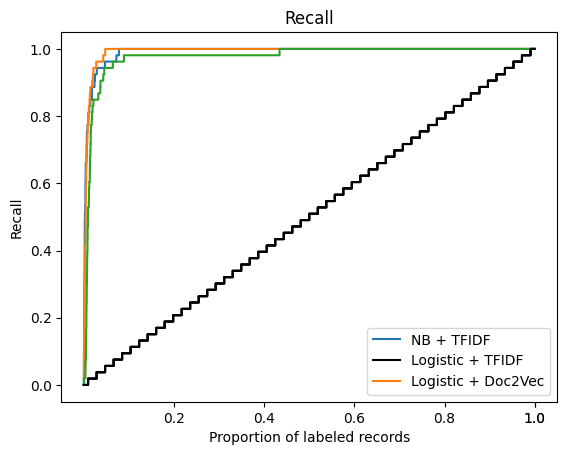

In [ ]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_recall

fig, ax = plt.subplots()

with open_state("states/B_NB_T.asreview") as s1:
  plot_recall(ax, s1)

with open_state("states/B_L_T.asreview") as s2:
  plot_recall(ax, s2)

with open_state("states/B_L_D.asreview") as s3:
  plot_recall(ax, s3)

with open_state("states/B_RF_T.asreview") as s4:
  plot_recall(ax, s4)

ax.lines[0].set_label("NB + TFIDF")
ax.lines[2].set_label("Logistic + TFIDF")
ax.lines[3].set_label("Logistic + Doc2Vec")
ax.lines[4].set_label("Random Forest + TFIDF")
ax.legend()

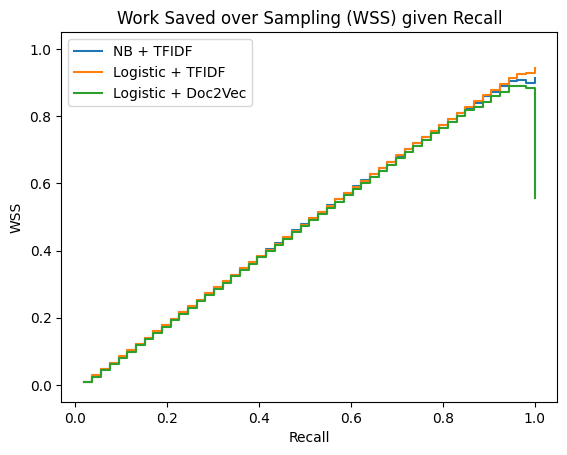

In [ ]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_wss

fig, ax = plt.subplots()

with open_state("states/B_NB_T.asreview") as s1:
  plot_wss(ax, s1)

with open_state("states/B_L_T.asreview") as s2:
  plot_wss(ax, s2)

with open_state("states/B_L_D.asreview") as s3:
  plot_wss(ax, s3)

ax.lines[0].set_label("NB + TFIDF")
ax.lines[1].set_label("Logistic + TFIDF")
ax.lines[2].set_label("Logistic + Doc2Vec")
ax.legend()

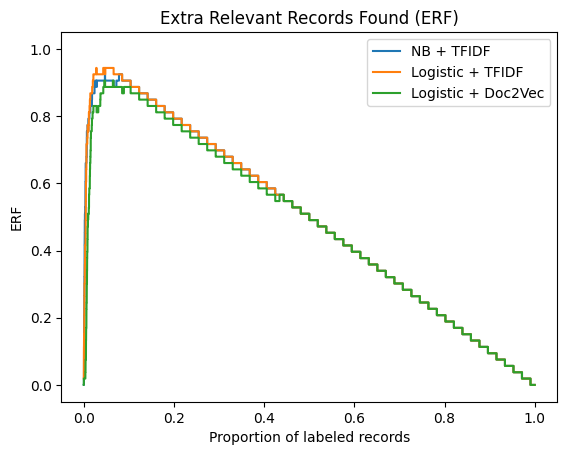

In [ ]:
import matplotlib.pyplot as plt

from asreview import open_state
from asreviewcontrib.insights.plot import plot_erf

fig, ax = plt.subplots()

with open_state("states/B_NB_T.asreview") as s1:
  plot_erf(ax, s1)

with open_state("states/B_L_T.asreview") as s2:
  plot_erf(ax, s2)

with open_state("states/B_L_D.asreview") as s3:
  plot_erf(ax, s3)

ax.lines[0].set_label("NB + TFIDF")
ax.lines[1].set_label("Logistic + TFIDF")
ax.lines[2].set_label("Logistic + Doc2Vec")
ax.legend()

In [ ]:
import pandas as pd
from asreviewcontrib.insights.metrics import wss, erf, average_time_to_discovery

def print_all_metrics(s):
  df = s.get_dataset()
  mit = pd.to_datetime(df.labeling_time.sort_values(ascending=True).unique()).to_series().diff().median().total_seconds() * 1000
  print(f'WSS@95: {wss(s, 0.95)}')
  print(f'MIT: {mit} ms')
  print(f'ATD: {average_time_to_discovery(s)}')
  print(f'RRF@10: {erf(s, 0.1)}')
  print()

with open_state("states/B_NB_T.asreview") as s:
  print("[NB + TFIDF]")
  print_all_metrics(s)

with open_state("states/B_L_T.asreview") as s:
  print("[Logistic + TFIDF]")
  print_all_metrics(s)

with open_state("states/B_L_D.asreview") as s:
  print("[Logistic + Doc2Vec]")
  print_all_metrics(s)

with open_state("states/B_RF_T.asreview") as s:
  print("[RF + TFIDF]")
  print_all_metrics(s)


[NB + TFIDF]
WSS@95: 0.9051686944516352
MIT: 67.693 ms
ATD: 401.5660377358491
RRF@10: 0.9056603773584906

[Logistic + TFIDF]
WSS@95: 0.9127836741737855
MIT: 62.807 ms
ATD: 331.0188679245283
RRF@10: 0.9056603773584906

[Logistic + Doc2Vec]
WSS@95: 0.8886012598153421
MIT: 237.936 ms
ATD: 1058.7169811320755
RRF@10: 0.8867924528301887

